<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/inferring_causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferring causal directions and causal Graphs
by Fayyaz Minhas

Assume you observe multiple measurements of two variables 'x' and 'y' (e.g., air quality and respiratory health or altitude and temperature). Through background knowledge, you know that  one of the variable causes the other but which one is the cause? Can we infer it? Under such cases, because we have the same underlying causal generative process giving rise to both these variables, we can expect statistical association between them but as we know, association or correlation between two variables does not always imply that they are causally linked. However, can we infer the causal direction when we known one of the variables causes the other?

In this simple demonstration, we show that under certain assumptions, it is possible to infer the causal direction $x\rightarrow
 y$ (x causes y) or $x\leftarrow y$ (y causes x).

In a linear system where x causes y through the relationship y = 0.5*x + e, with e being a noise component uniformly distributed, we can infer the direction of causality by comparing the mutual information between the input variables and the residuals of two regressors. When we predict y from x, the residuals (the differences between the observed and predicted values) should contain no additional information about x because x completely determines y along with the noise e. Conversely, if we predict x from y, the residuals will still retain information about y since y contains both the influence of x and the added noise e. By computing the mutual information, we find it to be higher when predicting the cause from the effect (x from y), which contradicts our model where x causes y. Hence, the correct causal direction (x causes y) is the one where the mutual information between the residuals and the cause is minimal, as the noise e is independent of x.

Below is a simple code demonstrating this. Notice the assymetry of mutual information values for the two models.



Text(0.5, 1.0, 'Correlation: -0.000, MI: 0.025')

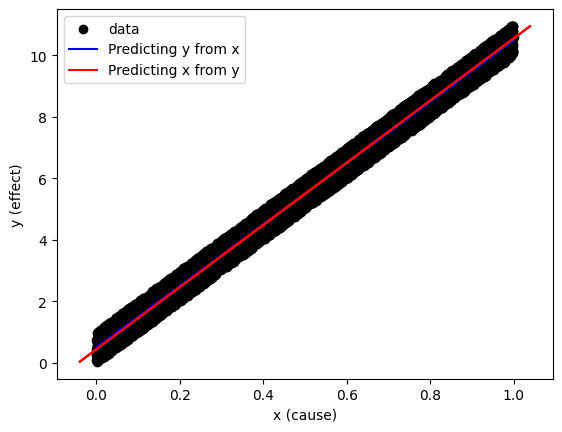

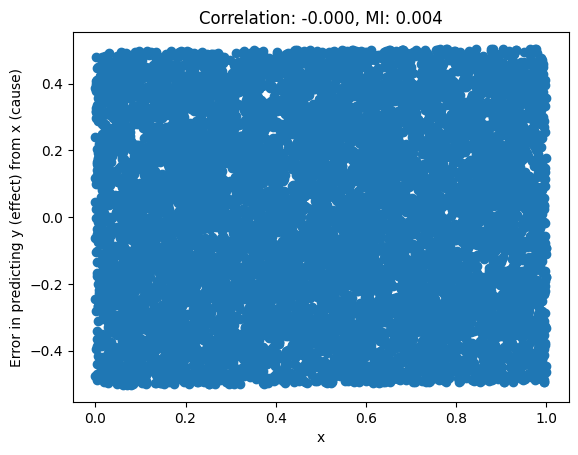

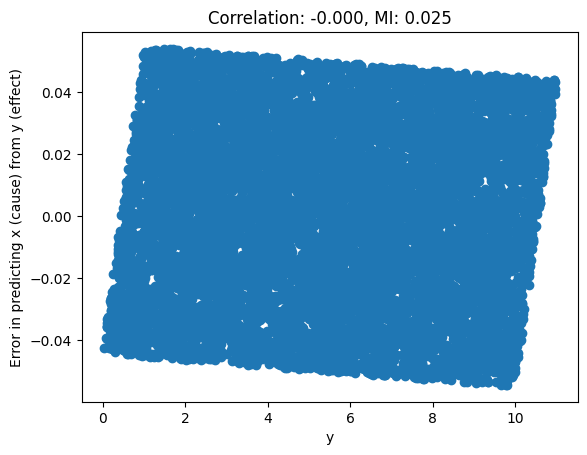

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score
def calc_MI(x, y, bins=10):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

#generate synthetic data
n = 10000
x = np.random.rand(n)
e = np.random.rand(n)
y = 10*x + e
plt.figure();plt.scatter(x,y,c='k');plt.xlabel('x (cause)'); plt.ylabel('y (effect)')

#fit models
cxy = np.polyfit(x,y,1)
cyx = np.polyfit(y,x,1)
xp = np.polyval(cyx,y)
yp = np.polyval(cxy,x)
plt.plot(x,yp,'b');
plt.plot(xp,y,'r');
plt.legend(['data','Predicting y from x','Predicting x from y'])
plt.figure();plt.scatter(x,yp-y); plt.xlabel('x');
plt.ylabel('Error in predicting y (effect) from x (cause)');
plt.title(f'Correlation: {pearsonr(x,yp-y).statistic:.3f}, MI: {calc_MI(x,yp-y):.3f}')
plt.figure();plt.scatter(y,xp-x); plt.xlabel('y');
plt.ylabel('Error in predicting x (cause) from y (effect)');
plt.title(f'Correlation: {pearsonr(y,xp-x).statistic:.3f}, MI: {calc_MI(y,xp-x):.3f}')


#A glitch in the matrix

As there is an assymetry in the mutual information, this allows us to infer that in this case x causes y. You can test this by inverting x and y in the above example.

Important Conceptual Note: The core idea revolves around the concept of asymmetry in data, which serves as a clue for causal inference, much like how the unidirectional flow of time informs us that causes must precede effects.

In the realm of data, this asymmetry manifests itself in various ways, but one crucial aspect is the distribution of noise—that is, the random variations that cannot be explained by our observed variables. When a variable x causes y, the system is influenced by some form of noise or randomness (e). If this noise is non-Gaussian, it has a distinct, asymmetrical pattern that does not mirror the normal bell curve.

This is where the asymmetry comes into play: if you try to reverse the presumed direction of causality—attempting to explain x as a function of y plus noise—you'll encounter a mismatch. The noise in the reverse direction doesn't align neatly with the data as it does when considering the true causal direction from x to y. This is because the true causal mechanism has been disturbed, much like playing a movie backwards; the narrative doesn't quite make sense.

Thus, the asymmetry in the distribution of noise, combined with our observations, can point us toward the true causal direction. It's this very imbalance that we harness when we measure how much information the residuals (the differences between our predictions and the actual data) retain about each variable. In the correct causal direction, we expect the residuals to be independent of the cause (x), holding minimal information about it, because the cause fully accounts for the effect (y) when the noise is factored in.

In summary, by looking for and measuring these asymmetries—much like detectives searching for inconsistencies in a story or a glitch in the matrix —we can infer the direction of causality in our data. This approach forms the crux of certain causal discovery methods, enabling scientists to peer into the complex web of cause and effect that governs our observations.




# Limitations and assuptions for inferring causal directions

Inferring causal directions from observational data relies on several assumptions. Here are some of the key assumptions under which causal directions between x and y might be inferred:

Causal Sufficiency: There are no hidden confounders that influence both x and y. This means that all common causes of x and y are observed and accounted for.

Temporal Precedence: x occurs before y. This is crucial because causation implies that the cause happens before the effect.

Association: There is a statistical association between x and y. If x causes y, then changes in x should be associated with changes in y.

No Reverse Causation: y does not cause x. This is important to establish the direction of causality.

Faithfulness (Stability): The statistical associations observed in the data are faithful to the underlying causal structure. This means that any independence observed in the data is a true reflection of the underlying causal independence.

Additive Noise Models: These models assume that the effect variable is generated by a cause variable with some additive noise (e.g.,
y=f(x)+e). If the noise e is non-Gaussian, then under certain conditions, it is possible to determine the direction of causation because the distribution of the observed data will be different depending on the direction of the causal effect.

Identifiability: For identifiability in these models, it's crucial that the noise has a different distribution than the cause. Gaussian distributions have a particular property known as 'symmetry' under convolution: the sum of two independent Gaussian variables is also Gaussian. This symmetry can obscure the causal direction because the model from cause to effect and the model from effect to cause may be statistically indistinguishable when the noise is Gaussian.

Exogeneity of the Error Term: The error term (e) is independent of the cause (x). This means the noise in the model does not depend on the value of x.

Homoscedasticity: The variance of the error term (e) is constant across all levels of x. This is not strictly necessary for causality but is often assumed in linear regression models to ensure that the standard errors of the parameter estimates are unbiased.

No Measurement Error: The variables x and y are measured without error. Measurement error can induce bias in the estimation of the causal effect.

Model Specification: The correct model form has been chosen, and the relationship is properly specified (i.e., no omitted variable bias).

Non-Contemporaneous Measurement: The measurements of x and y are taken at different times, allowing for the assumption that the value of x influencing y is the one that was measured prior to y.

When these assumptions are satisfied, various methods, such as regression analysis, Granger causality in time series, instrumental variables, difference-in-differences, and others, can be employed to infer causality. However, these assumptions are often strong and may not hold in all situations, which is why causal inference from observational data is complex and can rarely be definitive without experimental manipulation.



# Further reading on causal discovery

Elements of Causal Inference: Foundations and Learning Algorithms. Cambridge, Massachuestts: MIT Press, 2018.

Zhang, Keli, Shengyu Zhu, Marcus Kalander, Ignavier Ng, Junjian Ye, Zhitang Chen, and Lujia Pan. “gCastle: A Python Toolbox for Causal Discovery.” arXiv, November 30, 2021. https://doi.org/10.48550/arXiv.2111.15155.

Seif, Alireza, Mohammad Hafezi, and Christopher Jarzynski. “Machine Learning the Thermodynamic Arrow of Time.” arXiv:1909.12380 [Cond-Mat, Physics:Quant-Ph], September 26, 2019. http://arxiv.org/abs/1909.12380.

Vowels, Matthew J., Necati Cihan Camgoz, and Richard Bowden. “D’ya Like DAGs? A Survey on Structure Learning and Causal Discovery.” ACM Computing Surveys 55, no. 4 (November 21, 2022): 82:1-82:36. https://doi.org/10.1145/3527154.

Yu, Yue, Jie Chen, Tian Gao, and Mo Yu. “DAG-GNN: DAG Structure Learning with Graph Neural Networks.” arXiv, April 22, 2019. https://doi.org/10.48550/arXiv.1904.10098.

Alves, M. F. "Causal inference for the brave and true." (2022).

Pearl, Judea, and Dana Mackenzie. The book of why: the new science of cause and effect. Basic books, 2018.

